# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [5]:
df=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\nndb_flat.csv")
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [7]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [11]:
df.tail()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.20625,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.06725,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.00625,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.08750,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909
8617,93600,Finfish and Shellfish Products,"TURTLE,GREEN,RAW","Turtle, green, raw",NaN,NaN,NaN,89.0,19.80,0.50,...,0.0375,0.06875,0.115385,0.100000,0.098333,0.000278,0.047619,0.257143,0.305455,0.090909


In [15]:
df.shape


(8618, 45)

In [16]:
df.columns


Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [17]:
df.dtypes

ID                    int64
FoodGroup            object
ShortDescrip         object
Descrip              object
CommonName           object
MfgName              object
ScientificName       object
Energy_kcal         float64
Protein_g           float64
Fat_g               float64
Carb_g              float64
Sugar_g             float64
Fiber_g             float64
VitA_mcg            float64
VitB6_mg            float64
VitB12_mcg          float64
VitC_mg             float64
VitE_mg             float64
Folate_mcg          float64
Niacin_mg           float64
Riboflavin_mg       float64
Thiamin_mg          float64
Calcium_mg          float64
Copper_mcg          float64
Iron_mg             float64
Magnesium_mg        float64
Manganese_mg        float64
Phosphorus_mg       float64
Selenium_mcg        float64
Zinc_mg             float64
VitA_USRDA          float64
VitB6_USRDA         float64
VitB12_USRDA        float64
VitC_USRDA          float64
VitE_USRDA          float64
Folate_USRDA        

In [ ]:
#df.select.dtypes(include=object)

In [19]:
df.isna().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [22]:
df.duplicated().sum()

0

In [ ]:
#df.drop_duplicates(inplace=True)

AttributeError: 'DataFrame' object has no attribute 'unique'

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [24]:
df.corr()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


In [27]:


correlation = df['VitA_mcg' ].corr(df['VitA_USRDA'])

print("Correlación entre x e y:", correlation)


Correlación entre x e y: 0.999999999999999


In [28]:
correlation = df["Zinc_mg" ].corr(df['Zinc_USRDA'])

print("Correlación entre x e y:", correlation)

Correlación entre x e y: 1.0


In [32]:
#las ISRDA dependen son absolutamente dependientes así que las borro


df=df.drop(['VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], axis=1)


KeyError: "['VitA_USRDA' 'VitB6_USRDA' 'VitB12_USRDA' 'VitC_USRDA' 'VitE_USRDA'\n 'Folate_USRDA' 'Niacin_USRDA' 'Riboflavin_USRDA' 'Thiamin_USRDA'\n 'Calcium_USRDA' 'Copper_USRDA' 'Magnesium_USRDA' 'Phosphorus_USRDA'\n 'Selenium_USRDA' 'Zinc_USRDA'] not found in axis"

In [34]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

### Variables no numéricas
Elimina las variables de texto del dataset

In [35]:
df.dtypes

ID                  int64
FoodGroup          object
ShortDescrip       object
Descrip            object
CommonName         object
MfgName            object
ScientificName     object
Energy_kcal       float64
Protein_g         float64
Fat_g             float64
Carb_g            float64
Sugar_g           float64
Fiber_g           float64
VitA_mcg          float64
VitB6_mg          float64
VitB12_mcg        float64
VitC_mg           float64
VitE_mg           float64
Folate_mcg        float64
Niacin_mg         float64
Riboflavin_mg     float64
Thiamin_mg        float64
Calcium_mg        float64
Copper_mcg        float64
Iron_mg           float64
Magnesium_mg      float64
Manganese_mg      float64
Phosphorus_mg     float64
Selenium_mcg      float64
Zinc_mg           float64
dtype: object

In [40]:
df=df.drop(['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName'],axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8618 non-null   int64  
 1   Energy_kcal    8618 non-null   float64
 2   Protein_g      8618 non-null   float64
 3   Fat_g          8618 non-null   float64
 4   Carb_g         8618 non-null   float64
 5   Sugar_g        8618 non-null   float64
 6   Fiber_g        8618 non-null   float64
 7   VitA_mcg       8618 non-null   float64
 8   VitB6_mg       8618 non-null   float64
 9   VitB12_mcg     8618 non-null   float64
 10  VitC_mg        8618 non-null   float64
 11  VitE_mg        8618 non-null   float64
 12  Folate_mcg     8618 non-null   float64
 13  Niacin_mg      8618 non-null   float64
 14  Riboflavin_mg  8618 non-null   float64
 15  Thiamin_mg     8618 non-null   float64
 16  Calcium_mg     8618 non-null   float64
 17  Copper_mcg     8618 non-null   float64
 18  Iron_mg 

In [42]:
df.isna().sum()

ID               0
Energy_kcal      0
Protein_g        0
Fat_g            0
Carb_g           0
Sugar_g          0
Fiber_g          0
VitA_mcg         0
VitB6_mg         0
VitB12_mcg       0
VitC_mg          0
VitE_mg          0
Folate_mcg       0
Niacin_mg        0
Riboflavin_mg    0
Thiamin_mg       0
Calcium_mg       0
Copper_mcg       0
Iron_mg          0
Magnesium_mg     0
Manganese_mg     0
Phosphorus_mg    0
Selenium_mcg     0
Zinc_mg          0
dtype: int64

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [52]:
df=df+1
df

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1003,719.0,2.85,83.11,2.06,2.06,2.0,686.0,2.003,2.17,...,2.034,2.005,26.0,2.000,2.02,4.0,2.000,26.0,3.0,2.09
1,1004,719.0,2.85,83.11,2.06,2.06,2.0,686.0,2.003,2.13,...,2.034,2.005,26.0,2.016,2.16,4.0,2.004,25.0,3.0,2.05
2,1005,878.0,2.28,101.48,2.00,2.00,2.0,842.0,2.001,2.01,...,2.005,2.001,6.0,2.001,2.00,2.0,2.000,5.0,2.0,2.01
3,1006,355.0,23.40,30.74,4.34,2.50,2.0,200.0,2.166,3.22,...,2.382,2.029,530.0,2.040,2.31,25.0,2.009,389.0,16.5,4.66
4,1007,373.0,25.24,31.68,4.79,2.51,2.0,294.0,2.065,3.26,...,2.351,2.014,676.0,2.024,2.43,26.0,2.012,453.0,16.5,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83112,307.0,20.50,27.10,2.00,2.00,2.0,49.0,2.410,14.00,...,2.190,2.020,68.0,2.100,3.40,62.0,2.000,256.0,75.4,3.10
8614,90242,113.0,22.54,2.84,7.41,2.00,2.0,4.0,2.112,4.15,...,2.024,2.012,12.0,2.033,2.58,39.0,2.029,428.0,23.7,3.55
8615,90482,271.0,2.00,2.00,75.14,75.20,2.0,2.0,2.000,2.00,...,2.060,2.130,15.0,2.020,5.60,12.0,2.000,10.0,2.7,2.19
8616,90562,92.0,18.10,3.40,4.00,2.00,2.0,32.0,2.130,2.50,...,2.120,2.010,12.0,2.400,5.50,252.0,2.000,274.0,29.4,3.00


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler ()

df_estandarizado=scaler.fit_transform(df)




In [55]:
df_standarizado= pd.DataFrame(df_estandarizado, columns=df.columns)
df_standarizado

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-1.568911,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,-1.568802,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,-1.568694,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,-1.568585,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,-1.568477,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,7.335758,0.463820,0.661242,0.910973,-0.801069,-0.482325,-0.469058,-0.060269,0.304294,2.494770,...,-0.105030,-0.366279,-0.036808,-0.130522,-0.226446,0.486125,-0.079028,0.482632,2.148587,-0.259146
8614,8.109002,-0.681540,0.854607,-0.618138,-0.602446,-0.482325,-0.469058,-0.118012,-0.318374,0.214113,...,-0.474039,-0.381713,-0.314928,-0.251675,-0.369636,0.075888,-0.074484,1.329583,0.321132,-0.125138
8615,8.135030,0.251279,-1.092316,-0.671083,1.884207,4.899510,-0.469058,-0.120578,-0.552396,-0.283695,...,-0.394013,-0.154063,-0.300029,-0.275182,0.157724,-0.405694,-0.079028,-0.728704,-0.421161,-0.530139
8616,8.143705,-0.805522,0.433753,-0.582841,-0.727641,-0.482325,-0.469058,-0.082083,-0.280763,-0.167926,...,-0.260636,-0.385572,-0.314928,0.411953,0.140262,3.875036,-0.079028,0.571267,0.522612,-0.288925


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [56]:

n_components = 23  
pca = PCA(n_components=n_components)

pca.fit(df_estandarizado)

pca_features = pca.transform(df_estandarizado)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

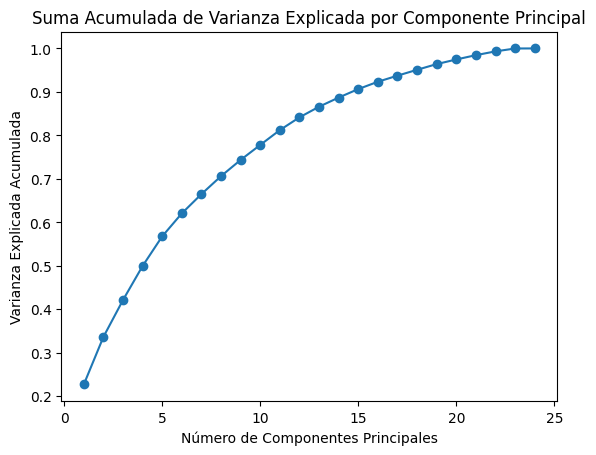

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la matriz de covarianza de los datos estandarizados
cov_matrix = np.cov(df_estandarizado.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los autovalores y autovectores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calcular la varianza explicada por cada componente principal
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Calcular la suma acumulada de la varianza explicada
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear el diagrama de líneas
plt.plot(range(1, len(cumulative_explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o')

# Establecer etiquetas y título del gráfico
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Suma Acumulada de Varianza Explicada por Componente Principal')

# Mostrar el gráfico
plt.show()


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [63]:
from sklearn.decomposition import PCA

# Obtén los porcentajes de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Obtén la varianza acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Imprime los porcentajes de varianza explicada por cada componente principal
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio*100:.2f}%")

# Imprime la varianza acumulada
print("Varianza acumulada:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Componente {i+1}: {ratio*100:.2f}%")


Componente 1: 22.71%
Componente 2: 10.93%
Componente 3: 8.49%
Componente 4: 7.83%
Componente 5: 6.82%
Componente 6: 5.28%
Componente 7: 4.43%
Componente 8: 4.13%
Componente 9: 3.73%
Componente 10: 3.45%
Componente 11: 3.41%
Componente 12: 2.94%
Componente 13: 2.45%
Componente 14: 2.10%
Componente 15: 1.95%
Componente 16: 1.68%
Componente 17: 1.40%
Componente 18: 1.35%
Componente 19: 1.31%
Componente 20: 1.06%
Componente 21: 0.99%
Componente 22: 0.87%
Componente 23: 0.66%
Varianza acumulada:
Componente 1: 22.71%
Componente 2: 33.64%
Componente 3: 42.13%
Componente 4: 49.96%
Componente 5: 56.78%
Componente 6: 62.06%
Componente 7: 66.49%
Componente 8: 70.62%
Componente 9: 74.35%
Componente 10: 77.80%
Componente 11: 81.21%
Componente 12: 84.15%
Componente 13: 86.59%
Componente 14: 88.70%
Componente 15: 90.65%
Componente 16: 92.33%
Componente 17: 93.74%
Componente 18: 95.08%
Componente 19: 96.40%
Componente 20: 97.46%
Componente 21: 98.45%
Componente 22: 99.32%
Componente 23: 99.98%


In [64]:

# Obtén los primeros 'X' componentes principales del PCA
X_pca = pca.transform(df_estandarizado)[:, :5]




In [67]:
# Realiza la transformación inversa para obtener el nuevo conjunto de datos con 'X' features
X_pca


array([[-1.12507078, -1.10775558, -3.49053991,  0.99810294, -3.07569922],
       [-1.11798237, -1.10963064, -3.4908719 ,  1.00787484, -3.06896021],
       [-0.99814742, -1.50587957, -4.51732912,  1.22142963, -3.90333123],
       ...,
       [-0.74953868, -3.75096837,  0.29885724,  2.11783183, -0.19725888],
       [ 0.37347948,  0.2033381 , -1.64635375, -0.51387784,  1.79339539],
       [-0.84858297,  0.70471961, -0.50701047, -0.29789075,  0.57676371]])

### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [69]:
import numpy as np

# Supongamos que has ajustado el PCA en tus datos y lo has llamado 'pca'

# Obtén la matriz de carga de componentes
componentes = pca.components_

# Obtén el índice de los tres grupos de comida con los valores más altos para cada componente principal
top_grupos = []
num_top_grupos = 3  # Número de grupos de comida superiores a considerar




In [71]:
for i in range(componentes.shape[0]):
    top_indices = np.argsort(componentes[i])[-num_top_grupos:][::-1]
    top_grupos.append(top_indices)



In [72]:
# Obtén los nombres de los grupos de comida correspondientes a los índices obtenidos
nombres_grupos = df.columns[top_grupos]

# Imprime los resultados
for i in range(componentes.shape[0]):
    print(f"Componente Principal {i+1}:")
    for j, grupo in enumerate(nombres_grupos[i]):
        print(f"Grupo {j+1}: {grupo}")
    print()

Componente Principal 1:
Grupo 1: Riboflavin_mg
Grupo 2: Niacin_mg
Grupo 3: VitB6_mg

Componente Principal 2:
Grupo 1: VitB12_mcg
Grupo 2: Protein_g
Grupo 3: Selenium_mcg

Componente Principal 3:
Grupo 1: Folate_mcg
Grupo 2: Riboflavin_mg
Grupo 3: Thiamin_mg

Componente Principal 4:
Grupo 1: VitA_mcg
Grupo 2: Copper_mcg
Grupo 3: VitB12_mcg

Componente Principal 5:
Grupo 1: Calcium_mg
Grupo 2: Magnesium_mg
Grupo 3: Phosphorus_mg

Componente Principal 6:
Grupo 1: VitE_mg
Grupo 2: VitC_mg
Grupo 3: Fat_g

Componente Principal 7:
Grupo 1: VitC_mg
Grupo 2: Calcium_mg
Grupo 3: Phosphorus_mg

Componente Principal 8:
Grupo 1: VitC_mg
Grupo 2: ID
Grupo 3: Fiber_g

Componente Principal 9:
Grupo 1: Manganese_mg
Grupo 2: ID
Grupo 3: Thiamin_mg

Componente Principal 10:
Grupo 1: Selenium_mcg
Grupo 2: Sugar_g
Grupo 3: Zinc_mg

Componente Principal 11:
Grupo 1: Selenium_mcg
Grupo 2: Manganese_mg
Grupo 3: Thiamin_mg

Componente Principal 12:
Grupo 1: VitE_mg
Grupo 2: Selenium_mcg
Grupo 3: ID

Componente

c:\Users\Abraham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
